<a href="https://colab.research.google.com/github/elizleon/PLN/blob/main/TallerPlenariaMINTIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Practica Análisis de Texto</h1>
<center><h1>Plenaria MINTIC</h1>
<center><h1>2021</h1>
<strong>Ciclo 1 </strong><br />
PROFESORA ELIZABETH LEON GUZMAN <br />


El objetivo de esta practica es programar en python algunos componentes para realizar análisis de datos textuales usando librerías como nltk, pandas, etc

Construiremos un text corpus sencillo sobre el cual demostraremos las diferentes metodologías y modelos de extracción de características.

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

In [55]:
corpus = ['El cielo esta azul y hermoso.',
'Me gusta el día de hoy, ¡soleado y cielo azul y hermoso!',
'El zorro marrón rápido salta sobre le perro perezoso.',
'El desayuno del rey tiene frutas. Tncluye fresas, uvas, y jugo de naranja',
'¡Me gusta la ensalada de frutas en epecial que tenga mango, fresas y uvas!',
'¡El zorro marrón es rápido y el perro azul es perezoso!',
'El cielo esta muy azul y el cielo es muy hermoso hoy',
'¡El perro es perezoso pero el zorro marrón es rápido!'
]

In [56]:
# Asignamos un label para cada oración 
labels = ['clima', 'clima', 'animales', 'comida', 'comida', 'animales', 'clima', 'animales']

In [57]:
# Convertimos el corpus a un Pandas dataframe
corpus = np.array(corpus)
corpus_df = pd.DataFrame({"Documento": corpus, "Categoria": labels})
corpus_df

,Documento,Categoria
0,El cielo esta azul y hermoso.,clima
1,"Me gusta el día de hoy, ¡soleado y cielo azul ...",clima
2,El zorro marrón rápido salta sobre le perro pe...,animales
3,El desayuno del rey tiene frutas. Tncluye fres...,comida
4,¡Me gusta la ensalada de frutas en epecial que...,comida
5,¡El zorro marrón es rápido y el perro azul es ...,animales
6,El cielo esta muy azul y el cielo es muy hermo...,clima
7,¡El perro es perezoso pero el zorro marrón es ...,animales


##  **Preprocesamiento (Noramlización del Texto)**

Antes de extraer características debemos preprocesar el texto, eliminado los caracteres innecesarios, los signos de puntuación, los stop words, tokenizar, etc.  

In [ ]:
# Popular corpus and classes
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [58]:
#Creación de una función para realizar las tareas de normalización
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('spanish')
def normalize_document(doc):
  # deaj en minúscula y remueve caracteres especiales y espacios en blanco
  #doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
  doc = re.sub(r'[^a-zA-Záéíóú\s]', '', doc, re.I|re.A)
  doc = doc.lower()
  doc = doc.strip()
  # tokenize document
  tokens = wpt.tokenize(doc)
  # filter stopwords out of document
  filtered_tokens = [token for token in tokens if token not in stop_words]
  # re-create document from filtered tokens
  doc = ' '.join(filtered_tokens)
  return doc

In [59]:
# Vectorizamos la función de extracción de características
normalize_corpus = np.vectorize(normalize_document)

In [60]:
# Normalizamos el corpus
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['cielo azul hermoso', 'gusta día hoy soleado cielo azul hermoso',
       'zorro marrón rápido salta perro perezoso',
       'desayuno rey frutas tncluye fresas uvas jugo naranja',
       'gusta ensalada frutas epecial mango fresas uvas',
       'zorro marrón rápido perro azul perezoso',
       'cielo azul cielo hermoso hoy',
       'perro perezoso zorro marrón rápido'], dtype='<U52')

## **2. Representación del texto**

In [ ]:
# Unir todas las palabras
all_words = " ".join(norm_corpus)

In [ ]:
# Calcula la frecuencia de las palabras
from collections import Counter
c = Counter(all_words.split())
#c(50)
print(c.elements)

<bound method Counter.elements of Counter({'veo': 1106, 'futuro': 876, 'programación': 846, 'desarrollo': 821, 'profesional': 771, 'conocimientos': 684, 'empresa': 668, 'ser': 596, 'software': 573, 'poder': 559, 'proyectos': 485, 'país': 419, 'trabajando': 408, 'tener': 358, 'tecnología': 348, 'gran': 330, 'programador': 328, 'aplicaciones': 325, 'quiero': 323, 'conocimiento': 316, 'web': 297, 'personas': 282, 'desarrollador': 279, 'trabajo': 273, 'sistemas': 271, 'laboral': 268, 'vida': 268, 'empresas': 262, 'siendo': 258, 'parte': 244, 'trabajar': 236, 'nuevas': 236, 'desarrollando': 232, 'ingeniero': 227, 'gustaría': 226, 'mundo': 223, 'herramientas': 222, 'habilidades': 218, 'desarrollar': 216, 'campo': 215, 'tecnologías': 212, 'datos': 210, 'empleo': 207, 'área': 207, 'soluciones': 206, 'mejor': 204, 'pueda': 201, 'carrera': 200, 'mas': 197, 'propia': 197, 'sociedad': 195, 'crear': 194, 'mejorar': 187, 'así': 180, 'manera': 179, 'hacer': 173, 'ayudar': 171, 'colombia': 166, 'difer

In [ ]:
#Ordena 
#sort_words = dict(c.most_common())
sort_words = dict(c.most_common(300))

2.1 Gráfica de Frecuencia de palabras

In [ ]:
#Extrae las etiquetas y los valores por separado
x_val = sort_words.values()
x_label = sort_words.keys()

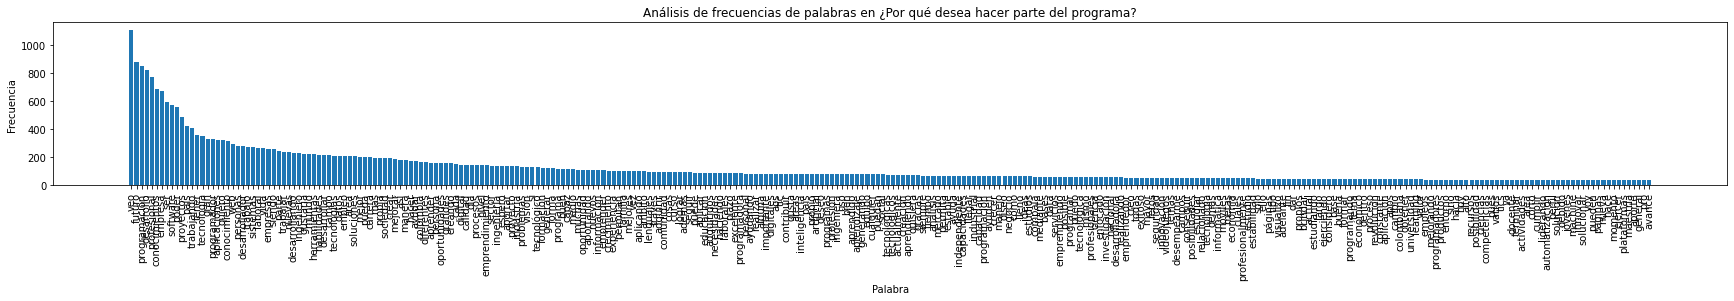

In [52]:
#Dibuja la Frecuencia de la palabras de mayor a menor (distribución de las frecuencias)
#plt.figure(figsize=(20,5))
plt.figure(figsize=(30,3))
plt.bar(x_label, x_val)
plt.xlabel("Palabra"); plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
#plt.title("Análisis de frecuencias de palabras en ¿Cuál es tu visión a futuro?")
#plt.savefig('vision.png')
#plt.title("Análisis de frecuencias de palabras en ¿Por qué desea hacer parte del programa?")
#plt.savefig('programa.png')
plt.show()

### 2.2. Nube de palabras

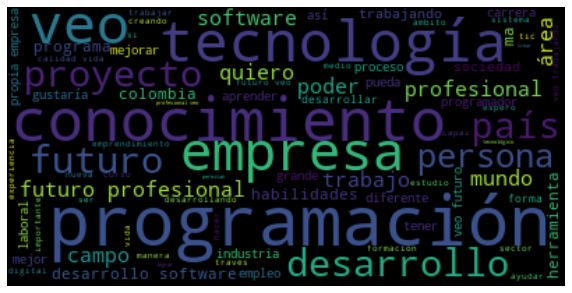

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
# Creamos la nube de palabras
im = WordCloud().generate(all_words)
# Visualizamos la nube de palabras
plt.imshow(im, interpolation="bilinear")
plt.axis("off")
#plt.savefig('nubeVision.png')
#plt.savefig('nubePrograma.png')
plt.show()

###Leyendo de Archivo


In [ ]:
import pandas as pd
comentarios = pd.read_excel("mintic_2.xlsx")
corpus1 = comentarios['¿Cuál es tu visión a futuro?']
print(corpus1.head(5))
corpus2 = comentarios['¿Por qué desea hacer parte del programa?']
print(corpus2.head(5))
#corpus = corpus1 + corpus2

0    Deseo mejorar mi futuro, en el que la tecnolog...
1    como una persona integra con conocimiento en p...
2    La tecnología de las tics siempre va a ir a la...
3                  Como dueño de mi propio dominio web
4    siendo un excelente diseñador multimedia con é...
Name: ¿Cuál es tu visión a futuro?, dtype: object
0    Me interesa desarrollar proyectos que acerquen...
1    porque en la programación esta el futuro de la...
2    Buenas noches, quiero hacer este programa por ...
3    Quiero tener el conocimiento neceserio en prog...
4    Quiero tener un amplio conocimiento de program...
Name: ¿Por qué desea hacer parte del programa?, dtype: object


In [ ]:
import nltk
stop_words=nltk.corpus.stopwords.words("spanish")

In [ ]:
# Normalizamos el corpus
norm_corpus = normalize_corpus(corpus1)
norm_corpus

array(['deseo mejorar futuro tecnología desplace humano si contrario éste desarrolle beneficie',
       'persona integra conocimiento programacion',
       'tecnología tics siempre va ir vanguardia desarrollo mundial manera veo gran programador',
       ..., 'ingeniero sistemas',
       'veo optimismo trabajando duro aprendiendo algun ambito laboral industria software',
       'profesional completo habilidades variadas éxito ámbito laboral'],
      dtype='<U1137')

##**Clasificación de documentos**

Análisis por clases

In [61]:
# Importamos el extractor de características BoW de Scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
# Instanciamos el extractor de características para la ocurrencia de palabras
cv = CountVectorizer(min_df=0., max_df=1.)
# Extraemos las características del corpus 
cv_matrix = cv.fit_transform(norm_corpus)
# El resultado es una matriz sparse
cv_matrix

<8x24 sparse matrix of type '<class 'numpy.int64'>'
	with 46 stored elements in Compressed Sparse Row format>

El resultado es una matriz sparse porque el número de palabras puede incrementarse de manera exponencial con cada nuevo documento, pues cada palabra distinta se convierte en una nueva característica. El resultado previo muestra los pares (x,y) de la matriz de características que son distintos de cero, donde x representa a un documento y y representa un termino en el corpus.



In [63]:
# Convertimos de la representación sparse a la densa para visualizarla como numpy array
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 1],
       [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 1],
       [1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 1]])

In [64]:
# Obtenemos todas las palabras diferentes en el corpus
vocab = cv.get_feature_names()
# Mostramos el documento y las features
pd.DataFrame(cv_matrix, columns=vocab)

,azul,cielo,desayuno,día,ensalada,epecial,fresas,frutas,gusta,hermoso,hoy,jugo,mango,marrón,naranja,perezoso,perro,rey,rápido,salta,soleado,tncluye,uvas,zorro
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,1
3,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0
4,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1
6,1,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1


In [65]:
# Importamos el extractor de características tf-idf de scikit-learn 
from sklearn.feature_extraction.text import TfidfTransformer

In [67]:
# Creamos el objeto tf-idf transformer y extraemos las características del corpus 
tt = TfidfTransformer(norm="l2", use_idf=True)
# Obtenemos la matrix tf-idf del modelo BoW 
tt_matrix = tt.fit_transform(cv_matrix)

In [68]:
# Visualizamos la matrix tf-idf
tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names()
data = pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)
data

,azul,cielo,desayuno,día,ensalada,epecial,fresas,frutas,gusta,hermoso,hoy,jugo,mango,marrón,naranja,perezoso,perro,rey,rápido,salta,soleado,tncluye,uvas,zorro
0,0.53,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.29,0.33,0.00,0.45,0.00,0.00,0.00,0.00,0.38,0.33,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.38,0.38,0.00,0.38,0.53,0.00,0.00,0.00,0.38
3,0.00,0.00,0.38,0.00,0.00,0.00,0.31,0.31,0.00,0.00,0.00,0.38,0.00,0.00,0.38,0.00,0.00,0.38,0.00,0.00,0.00,0.38,0.31,0.00
4,0.00,0.00,0.00,0.00,0.41,0.41,0.35,0.35,0.35,0.00,0.00,0.00,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.35,0.00
5,0.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42
6,0.33,0.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45


In [72]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train)
print(X_test)
print(Y_test)

   azul  cielo  desayuno   día  ensalada  ...  salta  soleado  tncluye  uvas  zorro
1  0.29   0.33      0.00  0.45      0.00  ...    0.0     0.45     0.00  0.00   0.00
7  0.00   0.00      0.00  0.00      0.00  ...    0.0     0.00     0.00  0.00   0.45
3  0.00   0.00      0.38  0.00      0.00  ...    0.0     0.00     0.38  0.31   0.00
0  0.53   0.60      0.00  0.00      0.00  ...    0.0     0.00     0.00  0.00   0.00
5  0.37   0.00      0.00  0.00      0.00  ...    0.0     0.00     0.00  0.00   0.42
4  0.00   0.00      0.00  0.00      0.41  ...    0.0     0.00     0.00  0.35   0.00

[6 rows x 24 columns]
   azul  cielo  desayuno  día  ensalada  ...  salta  soleado  tncluye  uvas  zorro
6  0.33   0.75       0.0  0.0       0.0  ...   0.00      0.0      0.0   0.0   0.00
2  0.00   0.00       0.0  0.0       0.0  ...   0.53      0.0      0.0   0.0   0.38

[2 rows x 24 columns]
['clima', 'animales']


In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
GNB = GaussianNB()
GNB.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [74]:
Y_pred = GNB.predict(X_test)
print(Y_pred)
accuracy_score(Y_test,Y_pred)

['clima' 'animales']


1.0